In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yahoo


In [3]:
#larger dataframe is neede for better accuracy so keep the start and end range gap more

start = '2010-01-01'
end = '2023-06-24'
df = yahoo.download('TSLA', start , end, progress=False)
# df = data.DataReader('TSLA','yahoo', start , end)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-16,258.920013,263.600006,257.209991,260.540009,260.540009,167563700
2023-06-20,261.500000,274.750000,261.119995,274.450012,274.450012,165611200
2023-06-21,275.130005,276.989990,257.779999,259.459991,259.459991,211797100
2023-06-22,250.770004,265.000000,248.250000,264.609985,264.609985,166875900
2023-06-23,259.290009,262.450012,252.800003,256.600006,256.600006,176584100


In [4]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3264,2023-06-16,258.920013,263.600006,257.209991,260.540009,260.540009,167563700
3265,2023-06-20,261.500000,274.750000,261.119995,274.450012,274.450012,165611200
3266,2023-06-21,275.130005,276.989990,257.779999,259.459991,259.459991,211797100
3267,2023-06-22,250.770004,265.000000,248.250000,264.609985,264.609985,166875900


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


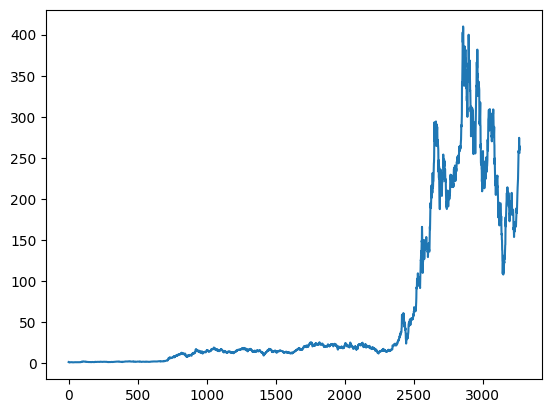

In [6]:
#shows closing price of tesla stock and this project is based upon Close column above
plt.plot(df.Close)

How to create the moving averages of Close column
if we consider 100 days then for knowing the closing price on 101 day for tesla stock it would be calculated by caluculating the mean of the closing price over previous 100 days and plot it for 101 day

In [7]:
moving_avg100 = df.Close.rolling(100).mean()
moving_avg100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3264    190.2997
3265    191.5999
3266    192.5918
3267    193.4589
3268    194.3583
Name: Close, Length: 3269, dtype: float64

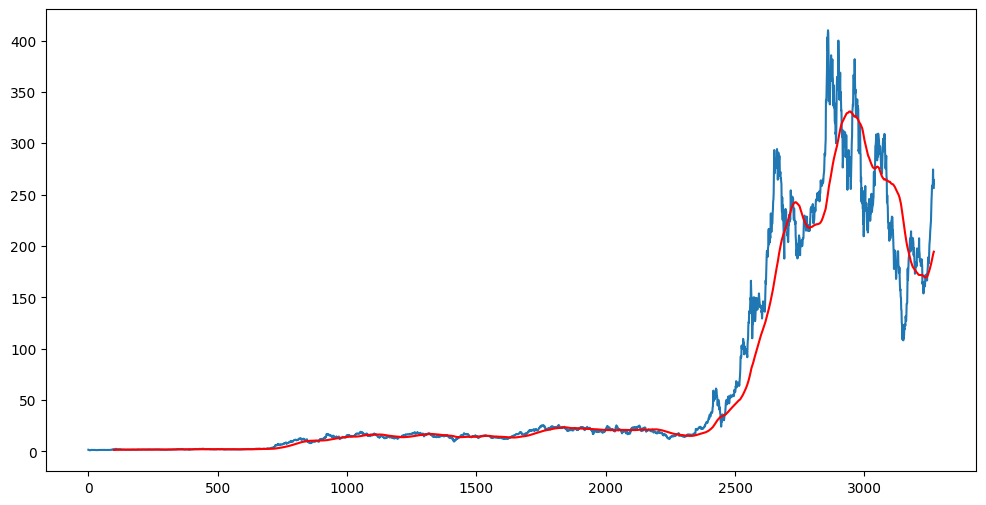

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_avg100, 'r')

In [9]:
#Moving average for first 200 days

moving_avg200 = df.Close.rolling(200).mean()
moving_avg200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3264    195.79515
3265    195.78935
3266    195.70085
3267    195.67285
3268    195.58375
Name: Close, Length: 3269, dtype: float64

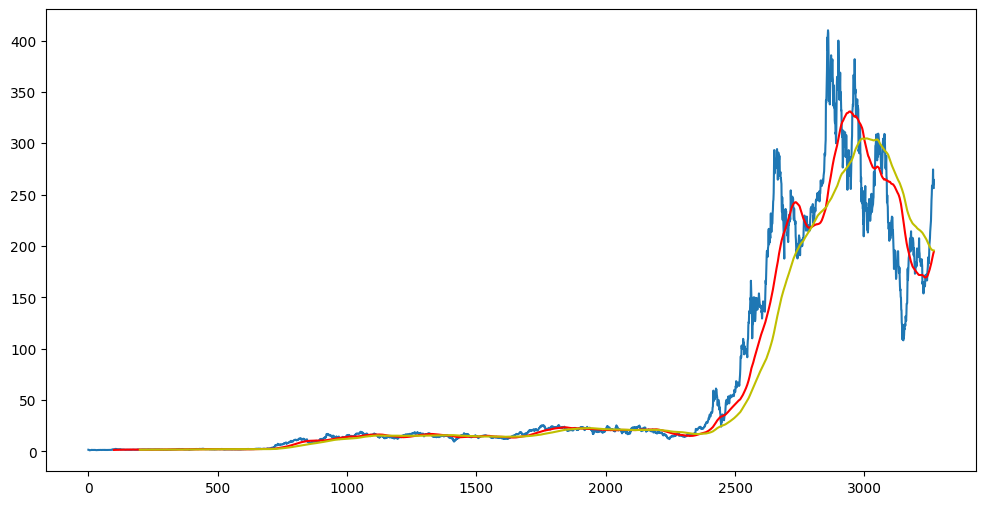

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_avg100, 'r')
plt.plot(moving_avg200, 'y')

In [11]:
df.shape

(3269, 5)

In [12]:
#From 2887 rows move 70 percent of data for training and 30 for testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [13]:
print(data_training.shape)
print(data_testing.shape)

(2288, 1)
(981, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)

In [16]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
from tensorflow import keras

In [18]:
#ML MODEL

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

Time series analysis is done so we considerding mean_squared error

In [21]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 60s 631ms/step - loss: 0.0464
Epoch 2/50
69/69 [==============================] - 56s 817ms/step - loss: 0.0110
Epoch 3/50
69/69 [==============================] - 46s 674ms/step - loss: 0.0102
Epoch 4/50
69/69 [==============================] - 42s 601ms/step - loss: 0.0098
Epoch 5/50
69/69 [==============================] - 27s 394ms/step - loss: 0.0089
Epoch 6/50
69/69 [==============================] - 30s 441ms/step - loss: 0.0082
Epoch 7/50
69/69 [==============================] - 45s 656ms/step - loss: 0.0084
Epoch 8/50
69/69 [==============================] - 36s 528ms/step - loss: 0.0082
Epoch 9/50
69/69 [==============================] - 35s 490ms/step - loss: 0.0079
Epoch 10/50
69/69 [==============================] - 47s 681ms/step - loss: 0.0077
Epoch 11/50
69/69 [==============================] - 29s 410ms/step - loss: 0.0081
Epoch 12/50
69/69 [==============================] - 24s 346ms/step - loss: 0.0068
Epoch 13/50
6

In [24]:
model.save('keras_model.h5')

C:\Users\prita.DESKTOP-2BRVQAR\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
#For predicting the value of 1st value of testing data we need the previous 100 days data.... so we fetch last 100 days values from training data and 
#append it with the testing data

past_100_days = data_training.tail(100)

In [31]:
# import pandas as pd

# Assuming you have defined the 'past_100_days' DataFrame and 'data_testing' DataFrame

# Use the 'concat' function to append 'data_testing' to 'past_100_days'
past_100_days = pd.concat([past_100_days, data_testing], ignore_index=True)


In [32]:
final_df = past_100_days

In [33]:
input_data = scaler.fit_transform(final_df)

In [34]:
input_data.shape

(1081, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [36]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [37]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 3s 64ms/step


In [39]:
y_predicted

array([[0.04134749],
       [0.0414215 ],
       [0.04147604],
       [0.04151073],
       [0.04152592],
       [0.04152307],
       [0.04150483],
       [0.04147428],
       [0.04143398],
       [0.04138657],
       [0.0413333 ],
       [0.04127398],
       [0.0412083 ],
       [0.04113698],
       [0.04106128],
       [0.04098246],
       [0.04090178],
       [0.04081945],
       [0.04073551],
       [0.04064989],
       [0.04056299],
       [0.04047593],
       [0.04039088],
       [0.04031025],
       [0.04023582],
       [0.04016957],
       [0.04011311],
       [0.04006794],
       [0.04003541],
       [0.04001766],
       [0.04001665],
       [0.04003344],
       [0.04006788],
       [0.04011887],
       [0.04018436],
       [0.04026204],
       [0.04034883],
       [0.0404413 ],
       [0.04053445],
       [0.04062319],
       [0.04070444],
       [0.04077697],
       [0.04084051],
       [0.04089598],
       [0.04094464],
       [0.04098684],
       [0.0410222 ],
       [0.041

In [40]:
scaler.scale_

array([0.00251232])

In [41]:
scale_factor = 1/0.00251232
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

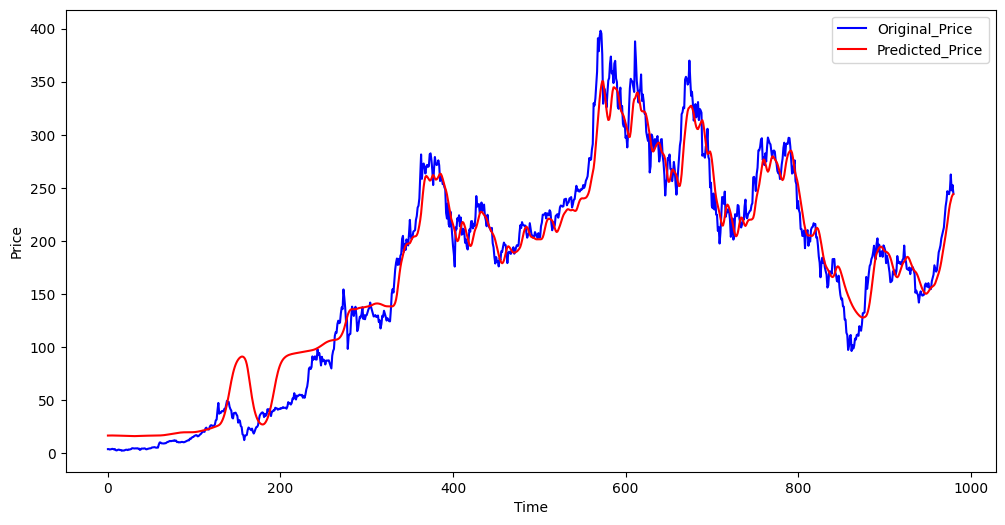

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original_Price')
plt.plot(y_predicted, 'r', label = 'Predicted_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
